In [3]:
import pandas as pd 
import numpy as np
import sklearn
import matplotlib
import seaborn


In [6]:
answer=np.sum([2,2])
print(answer)

4


In [9]:
df_nodes=pd.read_csv("orbis_nodes_0514.csv")
df_nodes.head()

,id,label,x,y
0,50002,Ad fl. Tigrim,37.325,42.196
1,50209,Iulia Concordia,45.757,12.844
2,50327,Roma,41.892,12.486
3,50319,Praetorium,31.500,15.500
4,50294,Patavium,45.410,11.877


In [10]:
df_edges=pd.read_csv("orbis_edges_0514.csv")
df_edges.head()

,source,target,km,days,expense,type
0,50001,50056,54.539,1.818,1.909,road
1,50001,50100,50.135,1.671,1.755,road
2,50001,50293,65.681,2.189,2.299,road
3,50001,50473,225.368,7.512,7.888,road
4,50002,50275,92.174,3.072,3.226,road


I want to see if there is a relationship between the type of shipment and the expense of it. A common cliche of the Roman Empire is that its roads brought it great power. However, maybe there were other types of transportation that really boosted its economy


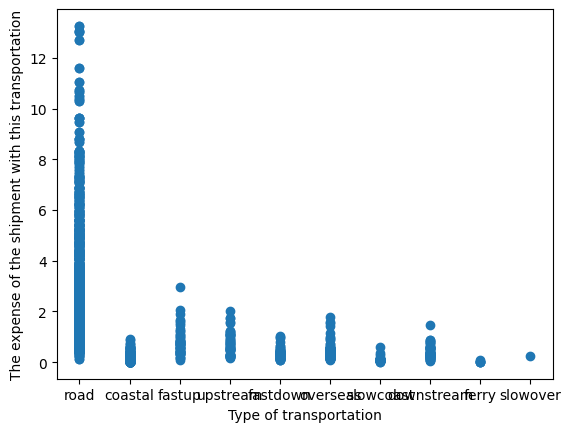

In [11]:
import matplotlib.pyplot as plt

type=df_edges['type']
expense=df_edges['expense']

plt.scatter(type,expense)

plt.xlabel("Type of transportation")
plt.ylabel("The expense of the shipment with this transportation")

plt.show()

In [13]:
import pandas as pd
from scipy import stats



# split into two groups
road_costs = df_edges.loc[df_edges["type"] == "road", "expense"].dropna()
other_costs = df_edges.loc[df_edges["type"] != "road", "expense"].dropna()

# difference in means
diff_means = road_costs.mean() - other_costs.mean()

# Welch's t-test (does not assume equal variances — recommended)
t_stat, p_value = stats.ttest_ind(road_costs, other_costs, equal_var=False)

print(f"Mean (road): {road_costs.mean():.3f}")
print(f"Mean (other): {other_costs.mean():.3f}")
print(f"Difference in means (road - other): {diff_means:.3f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4g}")


Mean (road): 3.388
Mean (other): 0.224
Difference in means (road - other): 3.164
T-statistic: 40.927
P-value: 7.865e-216


Looks like there is indeed a relationship from an intial look. It seems that roads on average are more expensive. Performing a difference of means test suggests that roads are significantly more expensive for shipments than all other forms of shipment. One thing to consider though is the coverage of data for the other types. There is an imbalance of sample sizes among the different types. 


There is another file with additional sites. I am starting to wonder if there is relationship between the modern day development and transportation hubs in the Roman empire.

In [14]:
df_sites=pd.read_csv('sites_extended.csv')
df_sites.head()

,id,label,rank,x,y,cost,target,province,modern
0,50001,Abodiacum,60,10.909,47.909,0,0,Raetia,Germany
1,50002,Ad fl. Tigrim,60,42.191,37.341,0,0,Armenia,Turkey
2,50003,Ad Publicanos,60,6.374,45.671,0,0,Narbonensis,France
3,50004,Ad Tricesimum,60,13.215,46.157,0,0,Italia,Italy
4,50005,Ad Aras,60,-0.977,38.736,0,0,Tarraconensis,Spain


Used a graph algorithm to calculate who the central hubs are with and without roads. There seems to be a slight positive relationship between the sites that have a lot of trade influence with roads and without roads. In other words, sites that have influence without roads also have influence without roads (see plot below). However, there might be a quite a bit of variance in this.  

In [15]:
df_power_brokers=pd.read_csv("orbis_nodes_0514_with_power_broker_scores.csv")
df_power_brokers.head()

,id,label,x,y,closeness_all_edges,closeness_no_road_edges
0,50002,Ad fl. Tigrim,37.325,42.196,0.068177,NaN
1,50209,Iulia Concordia,45.757,12.844,0.105980,NaN
2,50327,Roma,41.892,12.486,0.124175,0.121281
3,50319,Praetorium,31.500,15.500,0.120742,0.115137
4,50294,Patavium,45.410,11.877,0.089467,NaN


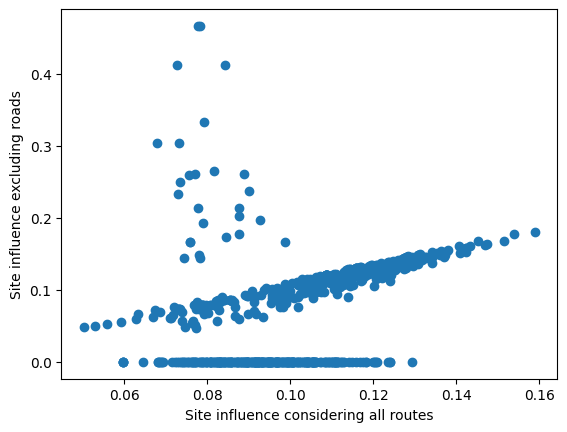

In [17]:
df_power_brokers=df_power_brokers.fillna(0)

closeness_all=df_power_brokers['closeness_all_edges']
closness_without=df_power_brokers['closeness_no_road_edges']

plt.scatter(closeness_all, closness_without)

plt.xlabel("Site influence considering all routes")
plt.ylabel("Site influence excluding roads")

plt.show()